# Program: seminar i corporate finance

## Kapital struktur: et dansk studie - optimal gælds græd 

In [267]:
# nedenstående kode er til at hente data og finde ud af hvor mange observationer der er pr. firma i dataen
# datasættet består af 25 observationer pr. firma der er 158 firmaer i alt

import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Excel file
# hent data fra excel filen 'financielle_data_renset.xlsx'
data = pd.read_excel('financielle_data_renset.xlsx')

# sorter data efter firma kode og år med den ældste år først
data = data.sort_values(by=['firma kode', 'year'])

# i data filen 'data' laves en variable kaldt *growth* som er den procentvise vækst i 'Total Revenue' fra år til år 
data['Growth']= data['Total Revenue'].pct_change() * 100

# Group by 'firma kode' and calculate 3-year rolling average
data['risk average'] = data.groupby('firma kode')['EBITDA/Tot Assets, %'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate deviation from the rolling average
data['risk'] = data['EBITDA/Tot Assets, %'] - data['risk average']

data.head()  # Display the first few rows of the DataFrame


### det her nede er en test af data
# Step 2: Count the number of observations per "firma kode"
#obs_per_firm = data['firma kode'].value_counts()

# Step 3: Print or save the result
#print(obs_per_firm)

# make a variable if the number of observations is not 25 
#obs_per_firm_wrong = obs_per_firm[obs_per_firm != 25]

#print(obs_per_firm_wrong)


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent","Long Term Debt to Total Capital, Percent",Net Debt To EBITDA (Daily Time Series Ratio),"Effective Tax Rate, (%)",Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk
24,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
23,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
22,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
21,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
20,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0


#### merger med branche data 

In [268]:
## merge with the dataset 'branche data.xlsx'

# load data 'branche data.xlsx'
branche_data = pd.read_excel('branche data.xlsx')

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' 
# with 'data' as a left join 'branche_data' as b on 'firma kode' = 'firma kode'
# from b take only variable 'Company Common Name' and 'NAICS Sector Name'               !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge = pd.merge(data, branche_data[['Firma kode', 'Company Common Name', 'NAICS Sector Name']], left_on='firma kode', right_on='Firma kode', how='left')
data_merge.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information


##### her fjernes observations hvor alle variable er 0 samt Finance and Insurance branchen 

In [269]:
# data test 
# make a copi of data called data_test
data_test = data_merge.copy()

# define all columns
cols_to_check = [
    "ROA Total Assets, Percent",
    "ROE Total Equity %",
    "EBITDA/Tot Assets, %",
    "Tot Assets/Comm Eqty",
    "Total Debt to Total Equity, Percent",
    "Long Term Debt to Total Capital, Percent",
    "Net Debt To EBITDA (Daily Time Series Ratio)",
    "Effective Tax Rate, (%)",
    "Quick Ratio",
    "EBITDA Margin, Percent",
    "Total Revenue",
    "Total Cash Dividends Paid, Cumulative"
]


# make the data_test sort out all obs if if alle variablerne er 0
data_test = data_test[
    (data_test[cols_to_check] != 0).any(axis=1)  # Keep rows where at least one column is not zero
]

# drop rows if 'NAICS Sector Name' is == "Finance and Insurance"
data_test = data_test[data_test['NAICS Sector Name'] != "Finance and Insurance"]

# make a variable called 'debt to assets ratio' by dividing 'Total Debt to Total Equity, Percent' with 'Tot Assets/Comm Eqty'
data_test['debt to assets ratio'] = data_test['Total Debt to Total Equity, Percent'] / data_test['Tot Assets/Comm Eqty']


data_test.head()  # Display the first few rows of the DataFrame

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name,debt to assets ratio
13,5PG.OL,2013-12-31 00:00:00,31,12,2013,0.000000,0.000000,0.000000,2.313655,83.113728,...,8.786299,5372000,0,inf,0.000000,0.000000,5PG.OL,5Th Planet Games A/S,Information,35.923133
14,5PG.OL,2014-12-31 00:00:00,31,12,2014,-8.789692,-14.383955,-2.942815,1.386966,20.551066,...,-19.151955,6344000,0,18.093820,-0.980938,-1.961877,5PG.OL,5Th Planet Games A/S,Information,14.817277
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,-519.918699,3198000,0,-49.590164,-10.671772,-18.400730,5PG.OL,5Th Planet Games A/S,Information,10.896584
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,-301.838304,5331000,0,66.697936,-22.200217,-12.385118,5PG.OL,5Th Planet Games A/S,Information,17.044044
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,-520.729685,3618000,0,-32.132808,-33.779405,-3.900972,5PG.OL,5Th Planet Games A/S,Information,4.485097


## Her skal data filteres 

Det datasæt den laves nedenunder der hedder "data_filter" giver signifikante estimationer. Vi skal derfor lave en mere grund filtering af outliers også bruge det datasæt til at lave den videre analyse. 

In [270]:
# List of variables to trim
trim_vars = ['ROA Total Assets, Percent', 'ROE Total Equity %', 'Total Debt to Total Equity, Percent']

# Create a copy to work with
data_trimmed = data_test.copy()

for var in trim_vars:
    lower = data_trimmed[var].quantile(0.05)
    upper = data_trimmed[var].quantile(0.95)
    data_trimmed = data_trimmed[(data_trimmed[var] >= lower) & (data_trimmed[var] <= upper)]


# First, make sure the data is sorted by 'firma kode' and 'year'
#data_trimmed = data_trimmed.sort_values(by=['firma kode', 'year'])

# Create a helper to count rows within each group
#data_trimmed['row_number'] = data_trimmed.groupby('firma kode').cumcount()
#data_trimmed['max_row'] = data_trimmed.groupby('firma kode')['row_number'].transform('max')

# Filter out the first and last observation for each group
#data_trimmed = data_trimmed[(data_trimmed['row_number'] != 0) & (data_trimmed['row_number'] != data_trimmed['max_row'])]

# Drop helper columns if you want
#data_trimmed = data_trimmed.drop(columns=['row_number', 'max_row'])


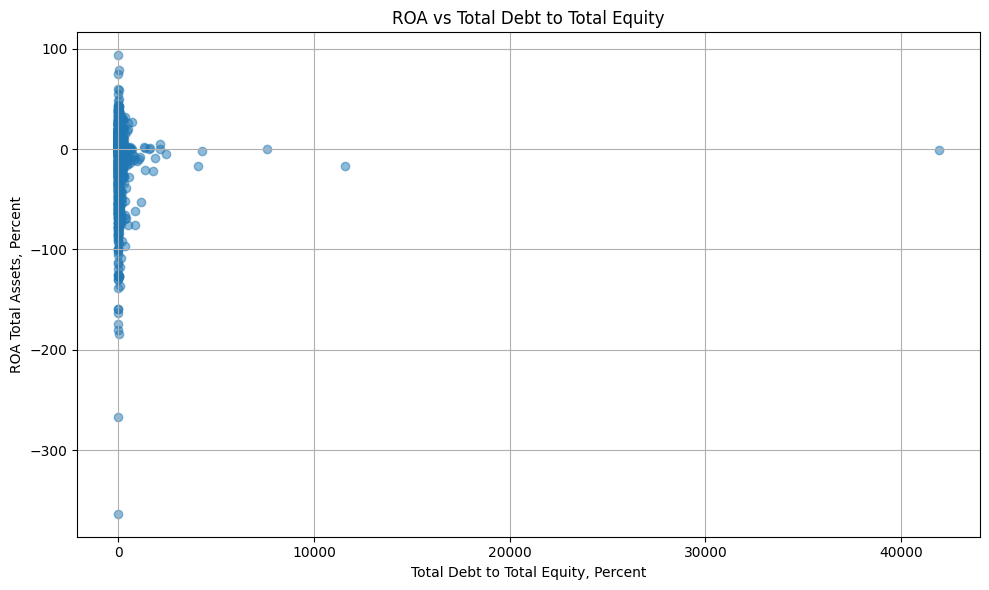

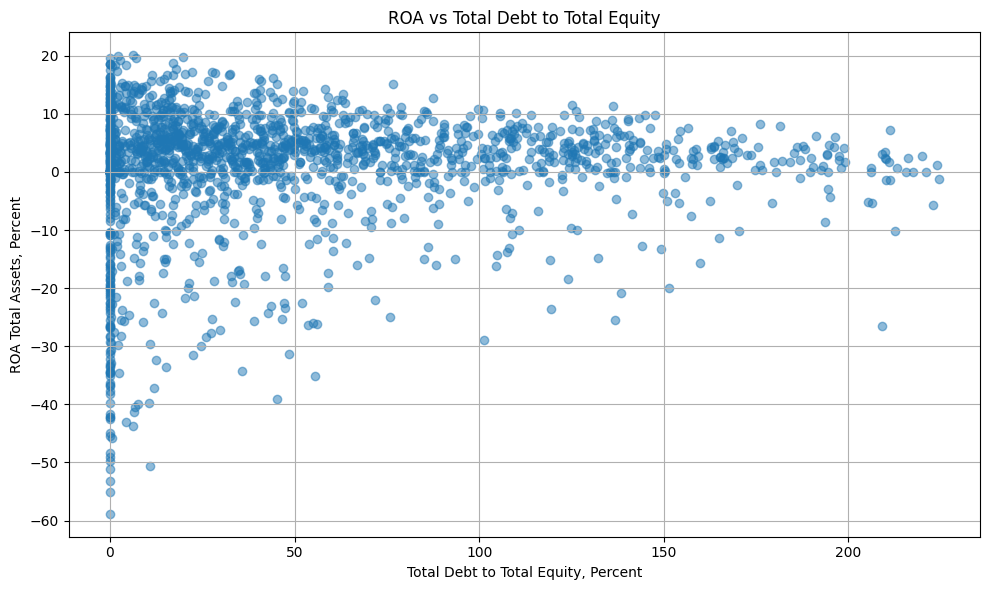

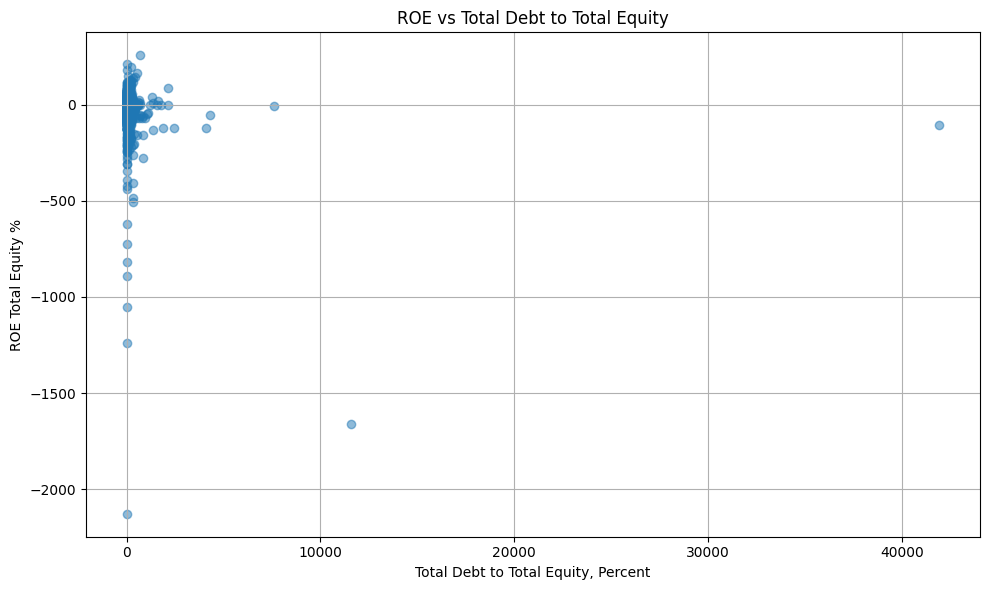

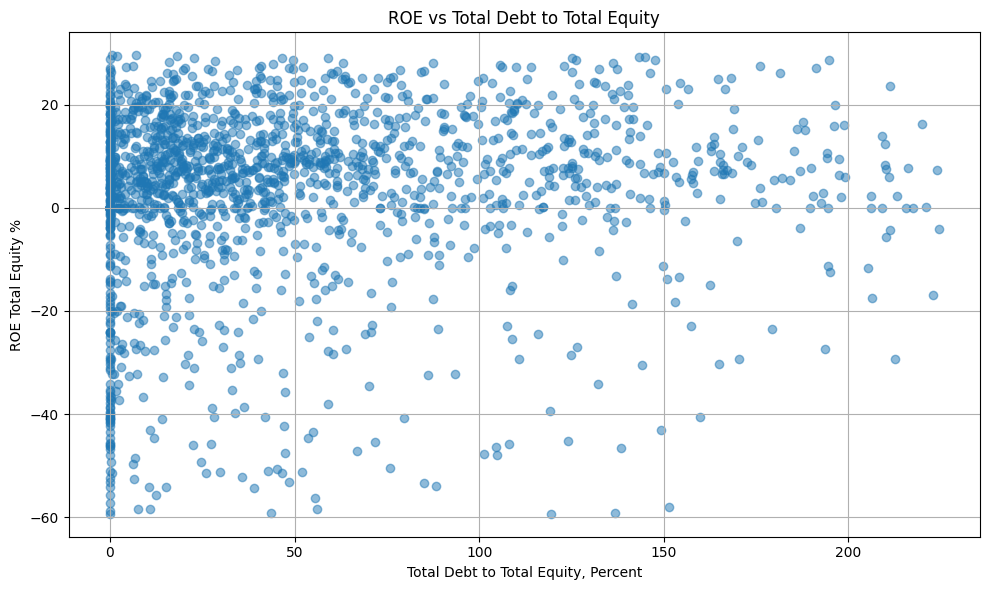

In [271]:
# Here we make four figures showing the ROA Total Assets, Percent and ROE Total Equity % agianst Total Debt to Total Equity, Percent and Long Term Debt to Total Capital, Percent

# first plot 'ROA Total Assets, Percent'against 'Total Debt to Total Equity, Percent'
# here we make a sorted dataset with only the year 2023 and and cut off 'ROA Total Assets, Percent' lower than "-50" and 'Total Debt to Total Equity, Percent' higher than "200"
#data_2023_filter = data[data['year'] == 2023]

#data_filter = data_test[(data_test['ROA Total Assets, Percent'] > -100) & (data_test['Total Debt to Total Equity, Percent'] < 200) & (data_test['Long Term Debt to Total Capital, Percent'] < 100)]
data_filter = data_test.copy()

# data test 
# make a copi of data called data_test
#data_test = data.copy()
#data_test.head(40)  # Display the first few rows of the DataFrame

# first plot 'ROA Total Assets, Percent'against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Total Debt to Total Equity, Percent'], data_filter['ROA Total Assets, Percent'], alpha=0.5)  
plt.title('ROA vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('ROA Total Assets, Percent')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROA_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['Total Debt to Total Equity, Percent'], data_trimmed['ROA Total Assets, Percent'], alpha=0.5)  
plt.title('ROA vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('ROA Total Assets, Percent')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROA_vs_TDTE_trimmed.png', dpi=300)  # Save figure

# first plot 'ROA Total Assets, Percent'against 'Term Debt to Total Capital, Percent'
#plt.figure(figsize=(10, 6))
#plt.scatter(data_filter['Long Term Debt to Total Capital, Percent'], data_filter['ROA Total Assets, Percent'], alpha=0.5)
#lt.title('ROA vs Long Term Debt to Total Capital')
#plt.xlabel('Long Term Debt to Total Capital, Percent')
#plt.ylabel('ROA Total Assets, Percent')
#plt.grid(True)

# first plot 'ROA Total Assets, Percent'against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Total Debt to Total Equity, Percent'], data_filter['ROE Total Equity %'], alpha=0.5)  
plt.title('ROE vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('ROE Total Equity %')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROE_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['Total Debt to Total Equity, Percent'], data_trimmed['ROE Total Equity %'], alpha=0.5)  
plt.title('ROE vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('ROE Total Equity %')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROE_vs_TDTE_trimmed.png', dpi=300)  # Save figure


# first plot 'ROA Total Assets, Percent'against 'Term Debt to Total Capital, Percent'
#plt.figure(figsize=(10, 6))
#plt.scatter(data_filter['Long Term Debt to Total Capital, Percent'], data_filter['ROE Total Equity %'], alpha=0.5)
#plt.title('ROE vs Long Term Debt to Total Capital')
#plt.xlabel('Long Term Debt to Total Capital, Percent')
#plt.ylabel('ROE Total Equity %')
#plt.grid(True)

plt.show()

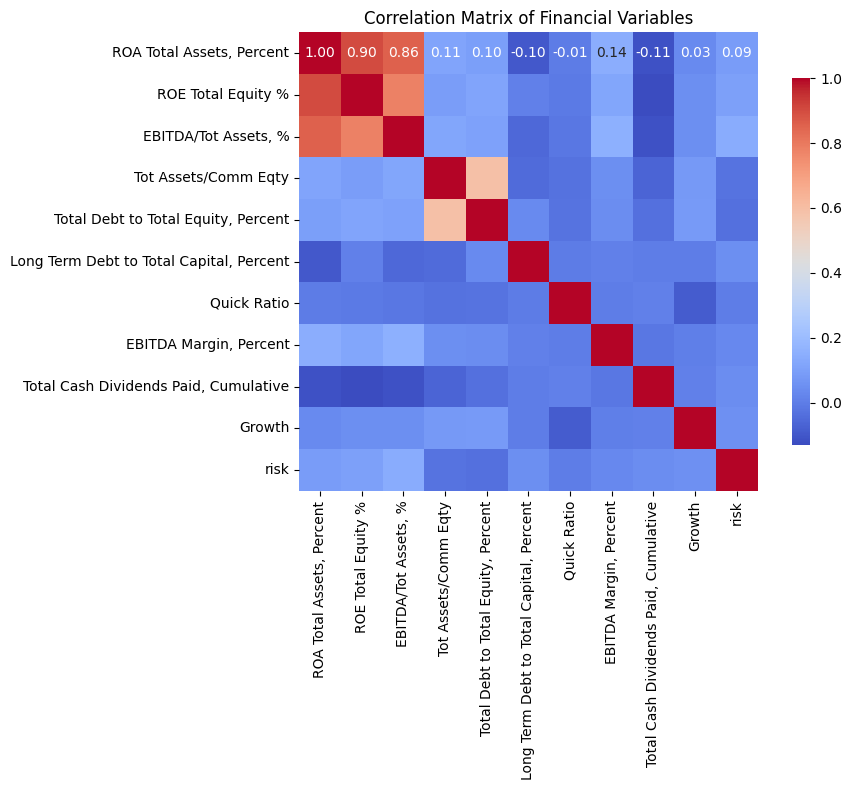

In [272]:
# here we make a correlation matrix of the data set for the variables 'ROA Total Assets, Percent', 'ROE Total Equity %',	'EBITDA/Tot Assets, %',	'Tot Assets/Comm Eqty',	'Total Debt to Total Equity, Percent',	'Long Term Debt to Total Capital, Percent',	'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth'
# and print it 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns for correlation
columns = [
    'ROA Total Assets, Percent',
    'ROE Total Equity %',
    'EBITDA/Tot Assets, %',
    'Tot Assets/Comm Eqty',
    'Total Debt to Total Equity, Percent',
    'Long Term Debt to Total Capital, Percent', 
    'Quick Ratio',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
# Create a new DataFrame with the selected columns
data_subset = data_trimmed[columns]
# Calculate the correlation matrix
correlation_matrix = data_subset.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Financial Variables')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)  # Save figure
plt.show()


In [273]:
# make a linear regression model with ROA Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA Total Assets, Percent']
X = data_trimmed[['Total Debt to Total Equity, Percent', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.075
Model:                                   OLS   Adj. R-squared:                  0.072
Method:                        Least Squares   F-statistic:                     7.755
Date:                       Thu, 24 Apr 2025   Prob (F-statistic):           3.22e-07
Time:                               10:45:52   Log-Likelihood:                -5973.3
No. Observations:                       1581   AIC:                         1.196e+04
Df Residuals:                           1574   BIC:                         1.200e+04
Df Model:                                  6                                         
Covariance Type:                         HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [274]:
# make a linear regression model with ROA Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA Total Assets, Percent']
X = data_trimmed[['Total Debt to Total Equity, Percent', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.075
Model:                                   OLS   Adj. R-squared:                  0.072
Method:                        Least Squares   F-statistic:                     7.755
Date:                       Thu, 24 Apr 2025   Prob (F-statistic):           3.22e-07
Time:                               10:45:52   Log-Likelihood:                -5973.3
No. Observations:                       1581   AIC:                         1.196e+04
Df Residuals:                           1574   BIC:                         1.200e+04
Df Model:                                  6                                         
Covariance Type:                         HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [275]:
# regression with 'Total Debt to Total Equity, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE Total Equity %']
X = data_trimmed[['Total Debt to Total Equity, Percent', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] #'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_TDTE = sm.OLS(y, X).fit(cov_type='HC3')

print(model_TDTE.summary())

                            OLS Regression Results                            
Dep. Variable:     ROE Total Equity %   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     10.53
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           5.88e-10
Time:                        10:45:52   Log-Likelihood:                -6698.6
No. Observations:                1581   AIC:                         1.341e+04
Df Residuals:                    1574   BIC:                         1.345e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


## Her laver vi regressionerne med fixed effekt på år og branche

#### Først laver vi for FE for år

In [276]:
import numpy as np
import statsmodels.formula.api as smf

# Make a clean copy
data_fe = data_trimmed.copy()

# Ensure year is string (for categorical)
data_fe['year'] = data_fe['year'].astype(str)

# Select only the variables used in the model
model_vars = [
    'ROA Total Assets, Percent',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year'
]

# Drop rows with NaN or inf in any of the model variables
data_fe = data_fe[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# Now run the model
model_ROA_FE = smf.ols(
    formula='Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + risk + Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year)',
    data=data_fe
).fit(cov_type='HC3') 

print(model_ROA_FE.summary())


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 30, but rank is 29
  warnings.warn('covariance of constraints does not have full '


                                  OLS Regression Results                                  
Dep. Variable:     Q("ROA Total Assets, Percent")   R-squared:                       0.109
Model:                                        OLS   Adj. R-squared:                  0.092
Method:                             Least Squares   F-statistic:                     3.653
Date:                            Thu, 24 Apr 2025   Prob (F-statistic):           2.81e-10
Time:                                    10:45:52   Log-Likelihood:                -5943.5
No. Observations:                            1581   AIC:                         1.195e+04
Df Residuals:                                1550   BIC:                         1.212e+04
Df Model:                                      30                                         
Covariance Type:                              HC3                                         
                                                 coef    std err          z      P>|z|    

In [277]:
import numpy as np
import statsmodels.formula.api as smf

# Make a clean copy
data_fe = data_trimmed.copy()

# Ensure year is string (for categorical)
data_fe['year'] = data_fe['year'].astype(str)

# Select only the variables used in the model
model_vars = [
    'ROE Total Equity %',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year'
]

# Drop rows with NaN or inf in any of the model variables
data_fe = data_fe[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# Now run the model
model_ROE_FE = smf.ols(
    formula='Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + risk + ' \
    'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year)',
    data=data_fe
).fit(cov_type='HC3') # fjernet control variabel + Q("Total Cash Dividends Paid, Cumulative")

print(model_ROE_FE.summary())


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 30, but rank is 29
  warnings.warn('covariance of constraints does not have full '


                               OLS Regression Results                              
Dep. Variable:     Q("ROE Total Equity %")   R-squared:                       0.112
Model:                                 OLS   Adj. R-squared:                  0.095
Method:                      Least Squares   F-statistic:                     4.170
Date:                     Thu, 24 Apr 2025   Prob (F-statistic):           1.33e-12
Time:                             10:45:52   Log-Likelihood:                -6668.2
No. Observations:                     1581   AIC:                         1.340e+04
Df Residuals:                         1550   BIC:                         1.356e+04
Df Model:                               30                                         
Covariance Type:                       HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

### Nu laver vi FE for branche

In [278]:
import numpy as np
import statsmodels.formula.api as smf

# Make a clean copy
data_fe_branche = data_trimmed.copy()

# Ensure year is string (for categorical)
data_fe_branche['branche'] = data_fe_branche['NAICS Sector Name'].astype(str)

# Select only the variables used in the model
model_vars = [
    'ROA Total Assets, Percent',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'branche'
]

# Drop rows with NaN or inf in any of the model variables
data_fe_branche = data_fe_branche[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# Now run the model
model_ROA_FE = smf.ols(
    formula='Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + risk + Q("Effective Tax Rate, (%)") '
    '+ Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + C(branche)',
    data=data_fe_branche
).fit(cov_type='HC3') 

print(model_ROA_FE.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Q("ROA Total Assets, Percent")   R-squared:                       0.158
Model:                                        OLS   Adj. R-squared:                  0.148
Method:                             Least Squares   F-statistic:                     11.28
Date:                            Thu, 24 Apr 2025   Prob (F-statistic):           1.34e-29
Time:                                    10:45:53   Log-Likelihood:                -5899.4
No. Observations:                            1581   AIC:                         1.184e+04
Df Residuals:                                1562   BIC:                         1.194e+04
Df Model:                                      18                                         
Covariance Type:                              HC3                                         
                                                                                          

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [279]:
# Make a clean copy
data_fe_branche_ROE = data_trimmed.copy()

# Ensure year is string (for categorical)
data_fe_branche_ROE['branche'] = data_fe_branche_ROE['NAICS Sector Name'].astype(str)

# Select only the variables used in the model
model_vars = [
    'ROE Total Equity %',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'branche'
]

# Drop rows with NaN or inf in any of the model variables
data_fe_branche_ROE = data_fe_branche_ROE[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# Now run the model
model_ROE_FE = smf.ols(
    formula='Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + risk + Q("Effective Tax Rate, (%)") '
    '+ Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + C(branche)',
    data=data_fe_branche_ROE
).fit(cov_type='HC3') 

print(model_ROE_FE.summary())


                               OLS Regression Results                              
Dep. Variable:     Q("ROE Total Equity %")   R-squared:                       0.156
Model:                                 OLS   Adj. R-squared:                  0.147
Method:                      Least Squares   F-statistic:                     14.08
Date:                     Thu, 24 Apr 2025   Prob (F-statistic):           4.47e-38
Time:                             10:45:53   Log-Likelihood:                -6628.2
No. Observations:                     1581   AIC:                         1.329e+04
Df Residuals:                         1562   BIC:                         1.340e+04
Df Model:                               18                                         
Covariance Type:                       HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


## Her laver vi en FE for både år og branche

In [280]:
# 1. Start fresh
data_fe_both = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_both['year'] = data_fe_both['year'].astype(str)
data_fe_both['branche'] = data_merge['NAICS Sector Name'].astype(str)

data_fe_both.head()

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name,debt to assets ratio,branche
13,5PG.OL,2013-12-31 00:00:00,31,12,2013,0.000000,0.000000,0.000000,2.313655,83.113728,...,5372000,0,inf,0.000000,0.000000,5PG.OL,5Th Planet Games A/S,Information,35.923133,Information
14,5PG.OL,2014-12-31 00:00:00,31,12,2014,-8.789692,-14.383955,-2.942815,1.386966,20.551066,...,6344000,0,18.093820,-0.980938,-1.961877,5PG.OL,5Th Planet Games A/S,Information,14.817277,Information
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,2848000,0,30.642202,-31.791953,5.856459,5PG.OL,5Th Planet Games A/S,Information,8.294375,Information
21,5PG.OL,2021-12-31 00:00:00,31,12,2021,-23.692567,-29.776776,-16.031863,1.208772,0.000000,...,4809000,0,68.855337,-21.884029,5.852166,5PG.OL,5Th Planet Games A/S,Information,0.000000,Information
24,5PG.OL,2024-12-31 00:00:00,31,12,2024,0.000000,0.000000,0.000000,0.000000,0.000000,...,12577000,0,28.809914,1.583406,-1.583406,5PG.OL,5Th Planet Games A/S,Information,NaN,Information


In [281]:
# 1. Start fresh
data_fe_both = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_both['year'] = data_fe_both['year'].astype(str)
data_fe_both['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars = [
    'ROA Total Assets, Percent',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_both = data_fe_both[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_ROA_FE_both = smf.ols(
    formula='Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_both
).fit(cov_type='HC3')

print(model_ROA_FE_both.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Q("ROA Total Assets, Percent")   R-squared:                       0.185
Model:                                        OLS   Adj. R-squared:                  0.162
Method:                             Least Squares   F-statistic:                     5.548
Date:                            Thu, 24 Apr 2025   Prob (F-statistic):           2.06e-25
Time:                                    10:45:53   Log-Likelihood:                -5873.7
No. Observations:                            1581   AIC:                         1.183e+04
Df Residuals:                                1538   BIC:                         1.206e+04
Df Model:                                      42                                         
Covariance Type:                              HC3                                         
                                                                                          

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


In [282]:
# 1. Start fresh
data_fe_both_ROE = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_both_ROE['year'] = data_fe_both_ROE['year'].astype(str)
data_fe_both_ROE['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROE = [
    'ROE Total Equity %',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_both_ROE = data_fe_both_ROE[model_vars_ROE].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_ROE_FE_both = smf.ols(
    formula='Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_both_ROE
).fit(cov_type='HC3')

print(model_ROE_FE_both.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("ROE Total Equity %")   R-squared:                       0.185
Model:                                 OLS   Adj. R-squared:                  0.163
Method:                      Least Squares   F-statistic:                     6.722
Date:                     Thu, 24 Apr 2025   Prob (F-statistic):           5.18e-33
Time:                             10:45:53   Log-Likelihood:                -6600.5
No. Observations:                     1581   AIC:                         1.329e+04
Df Residuals:                         1538   BIC:                         1.352e+04
Df Model:                               42                                         
Covariance Type:                       HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


## Her skal der laves den kvadratret effekt 

### koncavitet i ROA modellen

In [283]:
import numpy as np
import statsmodels.formula.api as smf

# Step 1: Create a new squared variable
data_trimmed['Debt_squared'] = data_trimmed['Total Debt to Total Equity, Percent'] ** 2

# Step 2: Drop NaNs and infinities (especially due to new variable)
model_vars = [
    'ROA Total Assets, Percent',
    'Total Debt to Total Equity, Percent',
    'Debt_squared',
    'risk',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth'
]

data_quad = data_trimmed[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# Step 3: Run the regression
model_quad = smf.ols(
    formula='Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + Debt_squared + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_quad
).fit(cov_type='HC3')

print(model_quad.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Q("ROA Total Assets, Percent")   R-squared:                       0.087
Model:                                        OLS   Adj. R-squared:                  0.083
Method:                             Least Squares   F-statistic:                     9.467
Date:                            Thu, 24 Apr 2025   Prob (F-statistic):           3.09e-10
Time:                                    10:45:53   Log-Likelihood:                -5963.1
No. Observations:                            1581   AIC:                         1.194e+04
Df Residuals:                                1573   BIC:                         1.199e+04
Df Model:                                       7                                         
Covariance Type:                              HC3                                         
                                                 coef    std err          z      P>|z|    

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [284]:
turning_point = -model_quad.params['Q("Total Debt to Total Equity, Percent")'] / (2 * model_quad.params['Debt_squared'])
print(f"Turning point (Debt Ratio where ROA is max/min): {turning_point:.2f}")

Turning point (Debt Ratio where ROA is max/min): 101.13


### konkavitet for ROE

In [285]:
import numpy as np
import statsmodels.formula.api as smf

# Step 1: Create the squared debt variable (if not already created)
data_trimmed['Debt_squared'] = data_trimmed['Total Debt to Total Equity, Percent'] ** 2

# Step 2: Define variables and drop missing/infinite values
model_vars = [
    'ROE Total Equity %',
    'Total Debt to Total Equity, Percent',
    'Debt_squared',
    'risk',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth'
]

data_quad_roe = data_trimmed[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# Step 3: Run the regression with quadratic term
model_quad_roe = smf.ols(
    formula='Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + Debt_squared + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_quad_roe
).fit(cov_type='HC3')

# Step 4: Print summary
print(model_quad_roe.summary())


                               OLS Regression Results                              
Dep. Variable:     Q("ROE Total Equity %")   R-squared:                       0.085
Model:                                 OLS   Adj. R-squared:                  0.081
Method:                      Least Squares   F-statistic:                     9.773
Date:                     Thu, 24 Apr 2025   Prob (F-statistic):           1.35e-10
Time:                             10:45:53   Log-Likelihood:                -6692.5
No. Observations:                     1581   AIC:                         1.340e+04
Df Residuals:                         1573   BIC:                         1.344e+04
Df Model:                                7                                         
Covariance Type:                       HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [286]:
turning_point_roe = -model_quad_roe.params['Q("Total Debt to Total Equity, Percent")'] / (2 * model_quad_roe.params['Debt_squared'])
print(f"Turning point (Debt Ratio where ROE is max/min): {turning_point_roe:.2f}")

Turning point (Debt Ratio where ROE is max/min): 112.75


## Random effekt estimation

#### her laver vi random effekt på ROA modellen 

In [287]:
#pip install linearmodels

In [288]:
data_panel = data_trimmed.copy()
data_panel['branche'] = data_merge['NAICS Sector Name'].astype(str)
data_panel['debt squared'] = data_panel['Total Debt to Total Equity, Percent'] ** 2
#data_panel.head()

In [289]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_panel_ROA = data_panel.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROA = [
    'ROA Total Assets, Percent',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_panel_ROA = data_panel_ROA[model_vars_ROA].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROA = RandomEffects.from_formula(
    'Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_panel_ROA
)
re_results_ROA = re_model.fit(cov_type='robust')
print(re_results_ROA.summary)


                              RandomEffects Estimation Summary                              
Dep. Variable:     Q('ROA Total Assets, Percent')   R-squared:                        0.0685
Estimator:                          RandomEffects   R-squared (Between):             -0.0860
No. Observations:                            1581   R-squared (Within):               0.0706
Date:                            Thu, Apr 24 2025   R-squared (Overall):              0.0806
Time:                                    10:45:54   Log-likelihood                   -5918.4
Cov. Estimator:                            Robust                                           
                                                    F-statistic:                      19.303
Entities:                                      13   P-value                           0.0000
Avg Obs:                                   121.62   Distribution:                  F(6,1575)
Min Obs:                                  10.0000                     

In [290]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model = PooledOLS.from_formula(
    'Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_panel_ROA
)
pooled_results = pooled_model.fit()

# LM test statistic for RE vs Pooled OLS
N = data_panel_ROA.index.get_level_values(0).nunique()  # Number of firms
T = data_panel_ROA.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results.resids
# Average residual by entity
e_bar = e.groupby(level=0).mean()

# LM statistic
LM_ROA = (T / (2 * N)) * ((e_bar ** 2).sum() / (e.var()))
p_value_ROA = 1 - stats.chi2.cdf(LM, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROA:.4f}")
print(f"P-value: {p_value_ROA:.4f}")


Breusch-Pagan LM statistic: 1.7205
P-value: 0.1896


#### her laver vi random effekt på ROE modellen 

In [291]:
#data_trimmed.head()

In [292]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_panel_roe = data_panel.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_roe = [
    'ROE Total Equity %',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_panel_roe = data_panel_roe[model_vars_roe].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_roe = RandomEffects.from_formula(
    'Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_panel_roe
)
re_results_roe = re_model_roe.fit(cov_type='robust')
print(re_results_roe.summary)

                           RandomEffects Estimation Summary                          
Dep. Variable:     Q('ROE Total Equity %')   R-squared:                        0.0742
Estimator:                   RandomEffects   R-squared (Between):              0.2468
No. Observations:                     1581   R-squared (Within):               0.0719
Date:                     Thu, Apr 24 2025   R-squared (Overall):              0.1049
Time:                             10:45:54   Log-likelihood                   -6641.0
Cov. Estimator:                     Robust                                           
                                             F-statistic:                      21.046
Entities:                               13   P-value                           0.0000
Avg Obs:                            121.62   Distribution:                  F(6,1575)
Min Obs:                           10.0000                                           
Max Obs:                            709.00   F-statist

In [293]:
from linearmodels.panel import PooledOLS
from scipy import stats

# Step 1: Estimate the pooled OLS model for ROE
pooled_model_roe = PooledOLS.from_formula(
    'Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_panel_roe
)
pooled_results_roe = pooled_model_roe.fit()

# Step 2: Get firm (N) and time (T) dimensions
N_roe = data_panel_roe.index.get_level_values(0).nunique()
T_roe = data_panel_roe.index.get_level_values(1).nunique()
#print(f"Number of firms (N): {N_roe}, Number of time periods (T): {T_roe}") 

# Step 3: Get residuals and their group averages
e_roe = pooled_results_roe.resids
e_bar_roe = e_roe.groupby(level=0).mean()


# Step 4: Calculate LM test statistic
LM_roe = (T_roe / (2 * N_roe)) * ((e_bar_roe ** 2).sum() / (e_roe.var()))
p_value_roe = 1 - stats.chi2.cdf(LM_roe, 1)

# Step 5: Output
print(f"Breusch-Pagan LM statistic (ROE): {LM_roe:.4f}")
print(f"P-value (ROE): {p_value_roe:.4f}")

Breusch-Pagan LM statistic (ROE): 1.9765
P-value (ROE): 0.1598


## Hausmann test for at se hvilken der er bedst RE eller FE 

#### Her for ROA

In [294]:
from linearmodels.panel import PanelOLS, RandomEffects, compare

# Make sure your panel data is properly indexed
data_panel_hausmann = data_panel.set_index(['branche', 'year'])
# Drop NA values (important!)
model_vars_ROA = [
    'ROA Total Assets, Percent',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_panel_hausmann = data_panel_hausmann[model_vars_ROA].replace([np.inf, -np.inf], np.nan).dropna()

# FE model (firm effects)
fe_model_hausmann = PanelOLS.from_formula(
    'Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk + EntityEffects',
    data=data_panel_hausmann
)
fe_results = fe_model_hausmann.fit(cov_type='robust')

# RE model
re_model_hausmann = RandomEffects.from_formula(
    'Q("ROA Total Assets, Percent") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_panel_hausmann
)
re_results = re_model_hausmann.fit(cov_type='robust')

# Compare models (includes Hausman test)
comparison = compare({'Fixed Effects': fe_results, 'Random Effects': re_results})
print(comparison)


                                                  Model Comparison                                                  
                                                                    Fixed Effects                     Random Effects
--------------------------------------------------------------------------------------------------------------------
Dep. Variable                                      Q('ROA Total Assets, Percent')     Q('ROA Total Assets, Percent')
Estimator                                                                PanelOLS                      RandomEffects
No. Observations                                                             1581                               1581
Cov. Est.                                                                  Robust                             Robust
R-squared                                                                  0.0712                             0.0685
R-Squared (Within)                                              

In [295]:
import numpy as np
from scipy import stats

# Step 1: Extract coefficients and variances (only common regressors!)
b_fe = fe_results.params
b_re = re_results.params

# Align them (only keep the matching variables)
common_coef = b_fe.index.intersection(b_re.index)
b_diff = b_fe[common_coef] - b_re[common_coef]

# Step 2: Get the variance-covariance matrices
V_fe = fe_results.cov
V_re = re_results.cov

# Align covariance matrices
V_diff = V_fe.loc[common_coef, common_coef] - V_re.loc[common_coef, common_coef]

# Step 3: Compute Hausman test statistic
stat = b_diff.T @ np.linalg.inv(V_diff) @ b_diff
df = len(b_diff)
p_value = 1 - stats.chi2.cdf(stat, df)

# Step 4: Print result
print(f"Hausman test statistic: {stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")


Hausman test statistic: 1.1279
Degrees of freedom: 6
P-value: 0.9803


#### her for ROE

In [296]:
from linearmodels.panel import PanelOLS, RandomEffects
import numpy as np
from scipy import stats

# Make sure your panel data is properly indexed
data_panel_hausmann_roe = data_panel.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_roe = [
    'ROE Total Equity %',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_panel_hausmann_roe = data_panel_hausmann_roe[model_vars_roe].replace([np.inf, -np.inf], np.nan).dropna()

# Step 1: FE model for ROE
fe_model_roe = PanelOLS.from_formula(
    'Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk + EntityEffects',
    data=data_panel_hausmann_roe
)
fe_results_roe = fe_model_roe.fit(cov_type='robust')

# Step 2: RE model for ROE (you might already have this as re_1_results)
re_model_roe = RandomEffects.from_formula(
    'Q("ROE Total Equity %") ~ Q("Total Debt to Total Equity, Percent") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_panel_hausmann_roe
)
re_results_roe = re_model_roe.fit(cov_type='robust')

# Step 3: Hausman test
b_fe = fe_results_roe.params
b_re = re_results_roe.params

# Common coefficients
common_coef = b_fe.index.intersection(b_re.index)
b_diff = b_fe[common_coef] - b_re[common_coef]

V_fe = fe_results_roe.cov
V_re = re_results_roe.cov

V_diff = V_fe.loc[common_coef, common_coef] - V_re.loc[common_coef, common_coef]

# Hausman test statistic
stat = b_diff.T @ np.linalg.inv(V_diff) @ b_diff
df = len(b_diff)
p_value = 1 - stats.chi2.cdf(stat, df)

# Step 4: Output
print(f"Hausman test statistic (ROE): {stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value (ROE): {p_value:.4f}")


Hausman test statistic (ROE): 0.7034
Degrees of freedom: 6
P-value (ROE): 0.9944


## Test af konkavitet i RE